<a href="https://colab.research.google.com/github/Reena6878/lohan/blob/master/handling_missing_values3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Random value imputation
#can handle both numeric and categorical value
import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_excel("/content/titanic.csv",usecols=['age','fare','survived'])

In [12]:
df.head(3)

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500


In [13]:
df.isnull().mean()*100

survived     0.000000
age         20.091673
fare         0.076394
dtype: float64

In [14]:
x=df.drop(columns=['survived'])
y=df['survived']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train['age_imputed']=x_train['age']
x_test['age_imputed']=x_test['age']

In [18]:
x_train.head()

,age,fare,age_imputed
772,17.0,7.8958,17.0
543,36.0,10.5000,36.0
289,18.0,79.6500,18.0
10,47.0,227.5250,47.0
147,NaN,42.4000,NaN


In [19]:
x_train['age_imputed'][x_train['age_imputed'].isnull()]=x_train['age'].dropna().sample(x_train['age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()]=x_test['age'].dropna().sample(x_test['age'].isnull().sum()).values

In [20]:
x_train['age'].dropna().sample(x_train['age'].isnull().sum()).values

array([ 0.9167, 48.    , 23.    , 51.    , 32.    , 27.    , 51.    ,
       42.    , 16.    , 17.    , 30.    , 24.    , 39.    , 26.    ,
       32.    ,  2.    , 47.    , 46.    , 23.    , 10.    , 48.    ,
       42.    , 40.    ,  6.    , 22.    , 54.    , 61.    , 14.    ,
       43.    , 33.    , 18.    , 24.    , 50.    , 18.    , 64.    ,
        0.8333, 50.    , 30.    , 21.    ,  3.    , 19.    , 54.    ,
        0.8333, 18.    , 11.5   , 26.    ,  0.75  , 34.    , 22.    ,
       41.    , 32.    , 38.    , 24.    , 45.    , 31.    , 19.    ,
       29.    , 27.    , 58.    , 30.    , 60.5   , 27.    , 27.    ,
       34.    , 25.    ,  2.    , 44.    , 47.    , 23.    , 29.    ,
       25.    , 19.    , 13.    , 30.    , 30.5   , 23.    , 21.    ,
       45.    , 43.    , 45.    , 20.    , 54.    , 22.    , 16.    ,
        6.    ,  0.4167, 17.    , 16.    , 24.    , 42.    , 30.    ,
       29.    , 20.    , 27.    ,  8.    , 11.    , 21.    , 34.    ,
       22.    , 22. 

In [21]:
x_train

,age,fare,age_imputed
772,17.0,7.8958,17.0
543,36.0,10.5000,36.0
289,18.0,79.6500,18.0
10,47.0,227.5250,47.0
147,NaN,42.4000,53.0
...,...,...,...
1095,NaN,7.6292,16.0
1130,18.0,7.7750,18.0
1294,28.5,16.1000,28.5
860,26.0,7.9250,26.0


<ipython-input-23-d65809f3043a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age'],label='Original',hist=False)
<ipython-input-23-d65809f3043a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age_imputed'],label='imputed',hist=False)


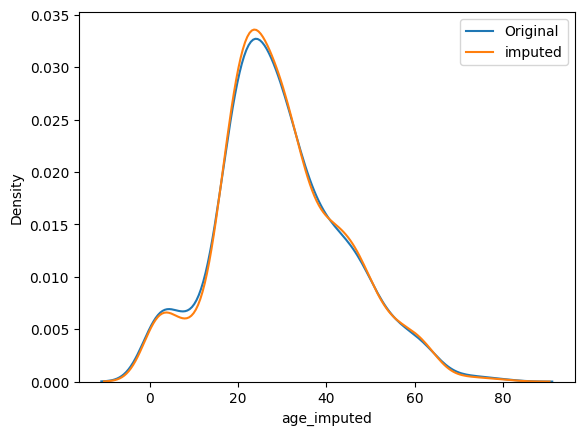

In [23]:
sns.distplot(x_train['age'],label='Original',hist=False)
sns.distplot(x_train['age_imputed'],label='imputed',hist=False)
plt.legend()
plt.show()

In [25]:
x_train[['fare','age','age_imputed']].cov()

,fare,age,age_imputed
fare,2684.246062,121.784745,99.661694
age,121.784745,203.513544,203.513544
age_imputed,99.661694,203.513544,198.323852


<Axes: >

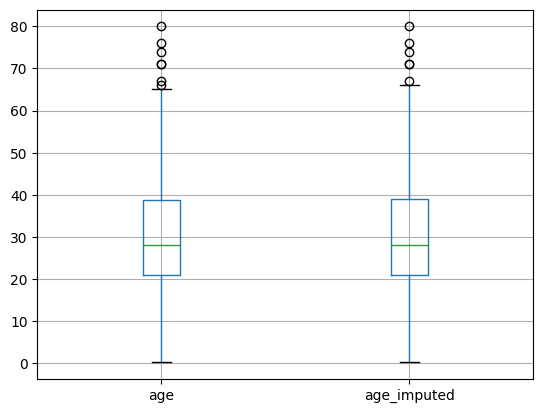

In [26]:
#outliers
x_train[['age','age_imputed']].boxplot()

In [27]:
#for categorical data imputation
data=pd.read_csv("/content/data_python.csv")

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [30]:
x=data
y=data['ApplicantIncome']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42
                                               )

In [34]:
x_train['Married_imputed']=x_train['Married']
x_test['Married_imputed']=x_test['Married']

x_train['Self_Employed_imputed']=x_train['Self_Employed']
x_test['Self_Employed_imputed']=x_test['Self_Employed']

In [35]:
x_train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_imputed,Self_Employed_imputed,Married_imputed
347,LP002131,Male,Yes,2,Not Graduate,No,3083,2168.0,126.0,360.0,1.0,Urban,Y,2,No,Yes
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,0,No,Yes
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y,0,No,Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,No,No
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y,0,No,No


In [37]:
x_train['Married_imputed'][x_train['Married_imputed'].isnull()]=x_train['Married'].dropna().sample(x_train['Married'].isnull().sum()).values
x_test['Self_Employed_imputed'][x_test['Self_Employed_imputed'].isnull()]=x_test['Self_Employed'].dropna().sample(x_test['Self_Employed'].isnull().sum()).values

<ipython-input-37-0b49f008c956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Married_imputed'][x_train['Married_imputed'].isnull()]=x_train['Married'].dropna().sample(x_train['Married'].isnull().sum()).values
<ipython-input-37-0b49f008c956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Self_Employed_imputed'][x_test['Self_Employed_imputed'].isnull()]=x_test['Self_Employed'].dropna().sample(x_test['Self_Employed'].isnull().sum()).values


In [38]:
x_train['Married'].dropna().sample(x_train['Married'].isnull().sum()).values

array(['Yes'], dtype=object)

In [42]:
 #to check frequencies after imputation and before imputation
#if there is more diff. in frequencies its not good for data otherwise its ok
temp=pd.concat(
    [
        x_train['Married'].value_counts()/len(x_train['Married'].dropna()),
        x_train['Married_imputed'].value_counts()/len(x_train)
    ],
    axis=1)
temp.columns=['original','imputation']

In [43]:
temp

,original,imputation
Yes,0.634694,0.635438
No,0.365306,0.364562


<ipython-input-47-ce100d248415>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Married']==category]['ApplicantIncome'],hist=False,label=category)
<ipython-input-47-ce100d248415>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Married']==cate

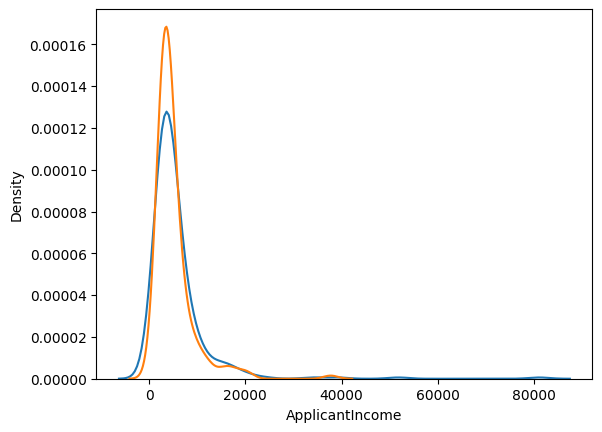

In [47]:
# using graph to check data is good or not after imputation
for category in x_train['Married'].dropna().unique():
  sns.distplot(x_train[x_train['Married']==category]['ApplicantIncome'],hist=False,label=category)
plt.show()

<ipython-input-46-ff2224975ab3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Married_imputed']==category]['ApplicantIncome'],hist=False,label=category)
<ipython-input-46-ff2224975ab3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Married

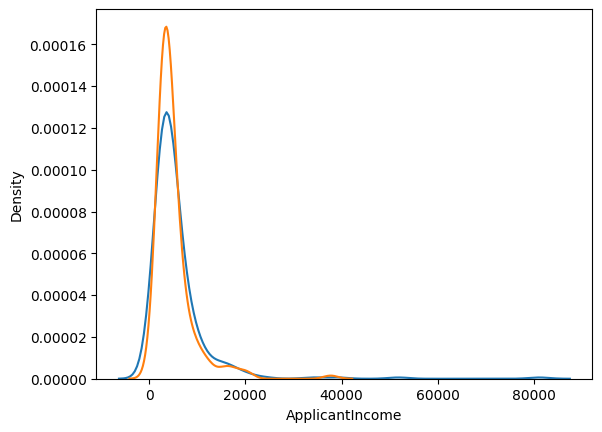

In [46]:
#after imputation
for category in x_train['Married_imputed'].dropna().unique():
  sns.distplot(x_train[x_train['Married_imputed']==category]['ApplicantIncome'],hist=False,label=category)
plt.show()